In [55]:
#imorting the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from IPython.display import display
from PIL import Image

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.metrics import classification_report, confusion_matrix

In [56]:
#Initialize the CNN
classifier = Sequential()

In [57]:
#Step 1 - Convolution
classifier.add(Conv2D(32, 
                      (3, 3), 
                      input_shape = (128, 128, 3)))
               
classifier.add(LeakyReLU(alpha=0.1))

In [58]:
#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [59]:
#step 3 - Flattening
classifier.add(Flatten())

In [60]:
#step 4 - Full Connection
classifier.add(Dense(units = 128))

classifier.add(LeakyReLU(alpha=0.1))

classifier.add(Dense(units = 26, 
                     activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

In [61]:
#Fitting the CNN to the images
train_datagen = ImageDataGenerator(
        shear_range = 0.2,
        zoom_range = 0.2,
        rescale = 1./255,
        horizontal_flip = False)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

In [62]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New/new_train_set',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New/new_test_set',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

Found 245 images belonging to 26 classes.
Found 74 images belonging to 26 classes.


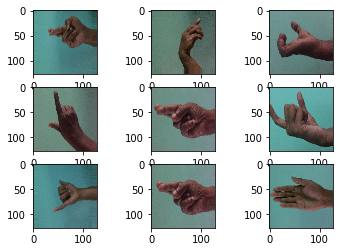

In [64]:
# generate samples and plot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = training_set.next()
    image = batch[0]
    plt.imshow(image[1])

#show the figure
pyplot.show()

In [65]:
#Training the network

history = classifier.fit_generator(
        training_set,
        steps_per_epoch = 200,
        epochs = 10,
        validation_data = test_set,
        validation_steps = 20)

Epoch 1/10
200/200 [==============================] - 572s 3s/step - loss: 2.1469 - acc: 0.6382 - val_loss: 0.7022 - val_acc: 0.7953
Epoch 2/10
200/200 [==============================] - 568s 3s/step - loss: 0.0613 - acc: 0.9893 - val_loss: 0.5465 - val_acc: 0.8580
Epoch 3/10
200/200 [==============================] - 558s 3s/step - loss: 0.0134 - acc: 0.9990 - val_loss: 0.4348 - val_acc: 0.8765
Epoch 4/10
200/200 [==============================] - 560s 3s/step - loss: 0.0078 - acc: 0.9990 - val_loss: 0.3723 - val_acc: 0.8799
Epoch 5/10
200/200 [==============================] - 562s 3s/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.5018 - val_acc: 0.8704
Epoch 6/10
200/200 [==============================] - 559s 3s/step - loss: 9.3290e-04 - acc: 1.0000 - val_loss: 0.4514 - val_acc: 0.8724
Epoch 7/10
200/200 [==============================] - 566s 3s/step - loss: 9.2808e-04 - acc: 1.0000 - val_loss: 0.4614 - val_acc: 0.8563
Epoch 8/10
200/200 [==============================] - 561s 3s

In [66]:
# save model and architecture to single file
classifier.save("SSLOriginal.h5")
print("Saved model to disk")

Saved model to disk


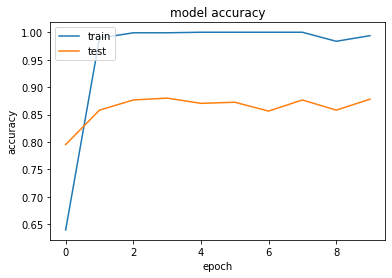

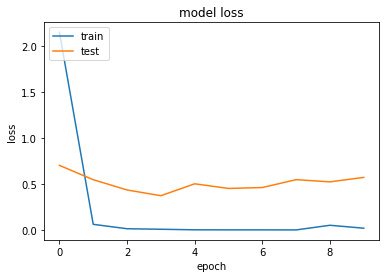

In [71]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [2]:
# load and evaluate a saved model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from numpy import loadtxt
from keras.models import load_model
from keras.preprocessing import image

from IPython.display import display
from PIL import Image

import numpy as np
from scipy.misc import imresize

import matplotlib.pyplot as plt
from matplotlib import pyplot

# load model
classifier = load_model('model.SSL')

[25]


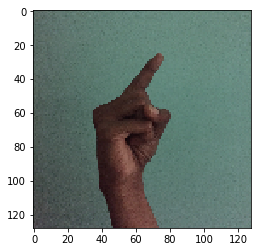

In [3]:
test_image = load_img('C:/Users/ASUS/Desktop/Research/Image Dataset/9/test/IMG_5911.jpg', 
                      target_size = (128, 128))

#test_image = test_image.rotate(-90)
#plt.imshow(test_image)

display_image = test_image.rotate(-90)
plt.imshow(display_image)

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict_classes(test_image)

print(result)

Sign 9


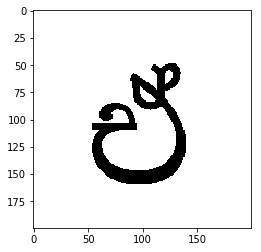

In [4]:
if result == 0:
    prediction = 'Sign 1'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter a.png')
elif result == 1:
    prediction = 'Sign 10'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter K.png')
elif result == 2:
    prediction = 'Sign 11'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter G.png')
elif result == 3:
    prediction = 'Sign 12'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter T.png')
elif result == 4:
    prediction = 'Sign 13'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter dh.png')
elif result == 5:
    prediction = 'Sign 14'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter th.png')
elif result == 6:
    prediction = 'Sign 15'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter D.png')
elif result == 7:
    prediction = 'Sign 16'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter N.png')
elif result == 8:
    prediction = 'Sign 17'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter P.png')
elif result == 9:
    prediction = 'Sign 18'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter B.png')
elif result == 10:
    prediction = 'Sign 19'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter M.png')
elif result == 11:
    prediction = 'Sign 2'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter aa.png')
elif result == 12:
    prediction = 'Sign 20'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter Y.png')
elif result == 13:
    prediction = 'Sign 21'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter R.png')
elif result == 14:
    prediction = 'Sign 22'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter L.png')
elif result == 15:
    prediction = 'Sign 23'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter V.png')
elif result == 16:
    prediction = 'Sign 24'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter S.png')
elif result == 17:
    prediction = 'Sign 25'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter H.png')
elif result == 18:
    prediction = 'Sign 26'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ch.png')
elif result == 19:
    prediction = 'Sign 3'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ae.png')
elif result == 20:
    prediction = 'Sign 4'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter i.png')
elif result == 21:
    prediction = 'Sign 5'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ii.png')
elif result == 22:
    prediction = 'Sign 6'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter u.png')
elif result == 23:
    prediction = 'Sign 7'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter uu.png')
elif result == 24:
    prediction = 'Sign 8'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter e.png')
elif result == 25:
    prediction = 'Sign 9'
    Result_Image = load_img('C:/Users/ASUS/Desktop/Research/Sinhala Letters/Letter ee.png')
    
print(prediction)
plt.imshow(Result_Image)